In [91]:
import numpy as np
import pandas as pd

In [92]:
df = pd.read_csv('xd2vf_anc_sales_Dec2019.csv')
print(df.shape)
df.head(3)

(14011, 28)


,id,date,creation_timestamp,request_from,pnr,first_name,last_name,flight_number,flight_date,is_charter,...,total_price,currency,converted_price,emd_number,form_of_payment,gateway_type,order_id,psp_reference_number,receipt_url,status
0,1,2019-11-30,2019-11-30 22:25:07,web,RQ4BNV,ASTKHIK,OGANESIAN,PS611,2019-12-02,0,...,7.00,EUR,7.00,5.668283e+12,Credit,Adyen,264886483740775,4645751520798127,https://receipts.checkin-gurus.com/production/...,100
1,2,2019-11-30,2019-11-30 22:25:14,web,NHG4MF,DANIELLA,NAFNAF,PS128,2019-12-01,0,...,343.39,UAH,13.15,5.668283e+12,Credit,UKRExim,53663368497151,933500472659,https://receipts.checkin-gurus.com/production/...,100
2,3,2019-11-30,2019-11-30 22:30:07,web,NHUAVQ,CEDRIC,SETROUK,PS128,2019-12-01,0,...,343.39,UAH,13.15,5.668283e+12,Credit,UKRExim,10570873518977,933500472697,https://receipts.checkin-gurus.com/production/...,100


In [93]:
df.columns

Index(['id', 'date', 'creation_timestamp', 'request_from', 'pnr', 'first_name',
       'last_name', 'flight_number', 'flight_date', 'is_charter', 'tkne',
       'customer_id', 'segment_id', 'ssr_type', 'ssr_sub_type', 'quantity',
       'base_price', 'tax', 'total_price', 'currency', 'converted_price',
       'emd_number', 'form_of_payment', 'gateway_type', 'order_id',
       'psp_reference_number', 'receipt_url', 'status'],
      dtype='object')

In [94]:
df.groupby(by=['ssr_sub_type'])['converted_price'].sum()

ssr_sub_type
ABAG      3480.88
APML        55.31
BEML       396.05
BZML        80.80
CBAG      5525.03
CBML       101.26
CDML       192.15
COML       199.89
CRML        70.80
DDML       121.89
FSML       104.90
GLML       265.46
HAML       136.67
HBML       177.84
HCML       111.02
HHML        55.28
HLML        12.06
HSML       313.97
KHML        54.40
KKML       526.80
KMML        34.31
KRML       222.24
LAML        42.18
LDML        33.20
LEML       307.92
LIML       310.98
LMML        54.34
LUML        99.07
MMML        16.23
PCML        20.14
PDBG     25430.77
PQML        81.01
PSML       208.75
PWML        83.83
RQST    130517.46
SCML       130.13
STML        18.11
SVML        54.42
VEML       181.12
VMML       211.02
Name: converted_price, dtype: float64

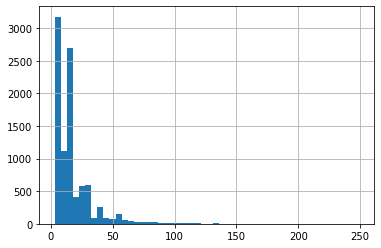

In [237]:
df.groupby(by=['pnr'])['converted_price'].sum().hist(bins=50)

In [238]:
print('median',df.groupby(by=['pnr'])['converted_price'].sum().median())
print('mean',df.groupby(by=['pnr'])['converted_price'].sum().mean())
print('std',df.groupby(by=['pnr'])['converted_price'].sum().std())

median 13.12
mean 17.76984951405572
std 17.631742872700553


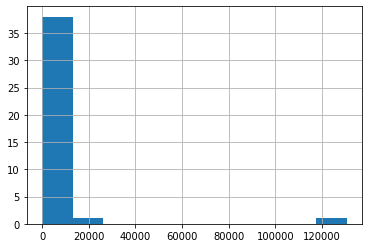

In [226]:
df.groupby(by=['ssr_sub_type'])['converted_price'].sum().hist()

In [95]:
df.pnr.nunique()

9569

In [96]:
df_pnr_ssr = pd.pivot_table(df, index=['pnr'], columns=['ssr_sub_type'], values=['converted_price'], 
                       aggfunc='count', fill_value=0)

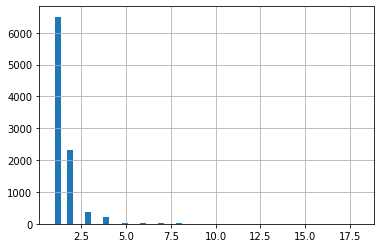

In [224]:
df_pnr_ssr.sum(axis=1).hist(bins=50)

In [97]:
df_pnr_ssr

converted_price                                               \
ssr_sub_type            ABAG APML BEML BZML CBAG CBML CDML COML CRML DDML   
pnr                                                                         
J22PCX                     0    0    0    0    0    0    0    0    0    0   
J23DNG                     0    0    0    0    0    0    0    0    0    0   
J23XRI                     0    0    0    0    0    0    0    0    0    0   
J246TE                     0    0    0    0    0    0    0    0    0    0   
J25PQG                     0    0    0    0    0    0    0    0    0    0   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
WZTNBZ                     0    0    0    0    0    0    0    0    0    0   
WZTW83                     0    0    0    0    0    0    0    0    0    0   
WZU2YA                     0    0    0    0    0    0    0    0    0    0   
WZW7TA                     0    0    0    0    0    0    0    0    0    0   
WZYANB                     0    0    0    0    0    0    0    0    0    0   

              ...                                                    
ssr_sub_type  ... PDBG PQML PSML PWML RQST SCML STML SVML VEML VMML  
pnr           ...                                                    
J22PCX        ...    0    0    0    0    2    0    0    0    0    0  
J23DNG        ...    0    0    0    0    4    0    0    0    0    0  
J23XRI        ...    0    0    0    0    1    0    0    0    0    0  
J246TE        ...    0    0    0    0    1    0    0    0    0    0  
J25PQG        ...    0    0    0    0    2    0    0    0    0    0  
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
WZTNBZ        ...    0    0    0    0    1    0    0    0    0    0  
WZTW83        ...    0    0    0    0    4    0    0    0    0    0  
WZU2YA        ...    0    0    0    0    2    0    0    0    0    0  
WZW7TA        ...    0    0    0    0    2    0    0    0    0    0  
WZYANB        ...    0    0    0    0    2    0    0    0    0    0  

[9569 rows x 40 columns]

In [98]:
df_pnr = df_pnr_ssr.stack().reset_index()


In [99]:
df_pnr.head()

,pnr,ssr_sub_type,converted_price
0,J22PCX,ABAG,0
1,J22PCX,APML,0
2,J22PCX,BEML,0
3,J22PCX,BZML,0
4,J22PCX,CBAG,0


In [100]:
from fastai.collab import *

In [101]:
data = CollabDataBunch.from_df(df_pnr, user_name='pnr', item_name='ssr_sub_type', 
                               rating_name='converted_price', seed=42)

In [102]:
max_count = df_pnr['converted_price'].max()

In [103]:
learn = collab_learner(data, n_factors=20, y_range=[0, max_count], wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


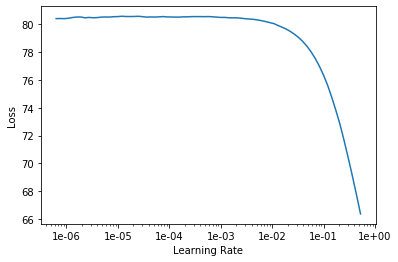

In [104]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [105]:
learn.fit_one_cycle(8, 1e-2)

epoch,train_loss,valid_loss,time
0,0.027470,0.029312,00:31
1,0.034155,0.036790,00:31
2,0.043026,0.036843,00:32
3,0.023257,0.033584,00:33
4,0.021066,0.028880,00:31
5,0.038283,0.028520,00:31
6,0.018254,0.027379,00:31
7,0.019734,0.027428,00:34


In [150]:
pnr_emb = learn.model.u_weight.weight.detach().numpy()

In [153]:
ssr_emb = learn.model.i_weight.weight.detach().numpy()

In [239]:
ssr_emb.shape, pnr_emb.shape

((41, 20), (9570, 20))

In [106]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
tSNE = TSNE(n_components=2, n_iter=1500,  perplexity=30.0, verbose=1)

In [234]:
pnr_features = tSNE.fit(pnr_emb)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9570 samples in 0.010s...
[t-SNE] Computed neighbors for 9570 samples in 0.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9570
[t-SNE] Computed conditional probabilities for sample 2000 / 9570
[t-SNE] Computed conditional probabilities for sample 3000 / 9570
[t-SNE] Computed conditional probabilities for sample 4000 / 9570
[t-SNE] Computed conditional probabilities for sample 5000 / 9570
[t-SNE] Computed conditional probabilities for sample 6000 / 9570
[t-SNE] Computed conditional probabilities for sample 7000 / 9570
[t-SNE] Computed conditional probabilities for sample 8000 / 9570
[t-SNE] Computed conditional probabilities for sample 9000 / 9570
[t-SNE] Computed conditional probabilities for sample 9570 / 9570
[t-SNE] Mean sigma: 0.000212
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.805321
[t-SNE] KL divergence after 1500 iterations: 0.338789


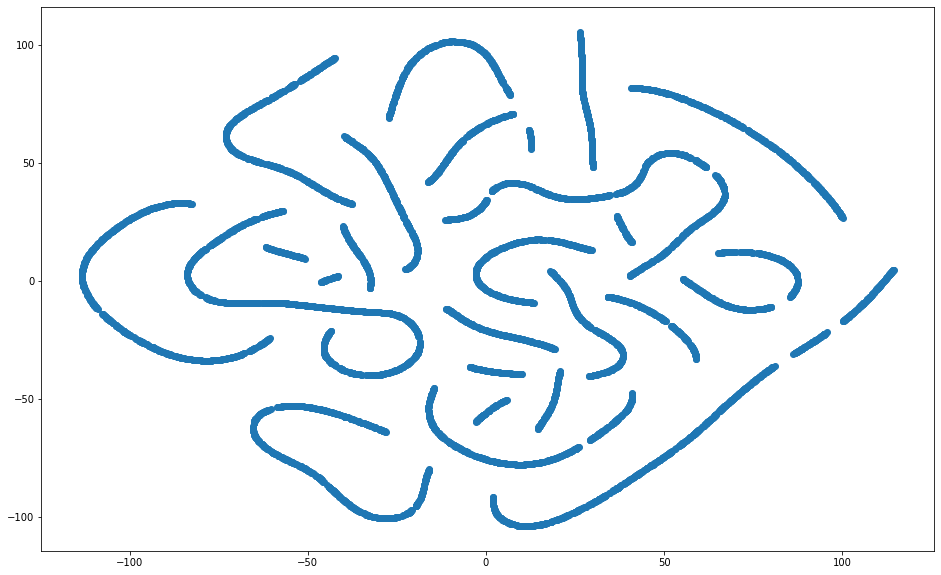

In [235]:
plt.figure(figsize=(16,10))
plt.scatter(pnr_features.embedding_[:,0], pnr_features.embedding_[:,1])

In [156]:
tSNE = TSNE(n_components=2, perplexity=10.0, n_iter=1000, verbose=1)
ssr_features = tSNE.fit(ssr_emb)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 41 samples in 0.000s...
[t-SNE] Computed neighbors for 41 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 41 / 41
[t-SNE] Mean sigma: 0.153427
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.075199
[t-SNE] KL divergence after 1000 iterations: 0.098991


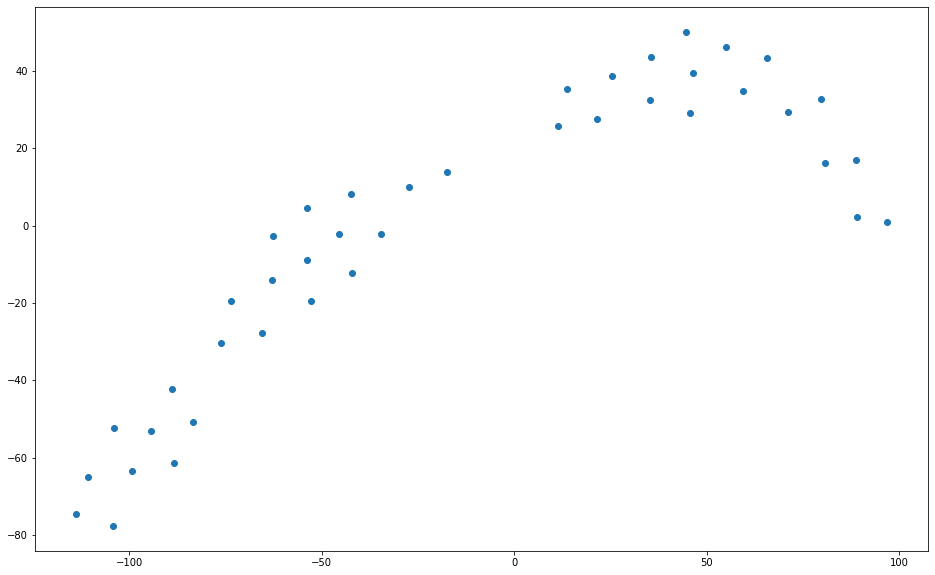

In [157]:
plt.figure(figsize=(16,10))
plt.scatter(ssr_features.embedding_[:,0], ssr_features.embedding_[:,1])

In [158]:
from sklearn.mixture import BayesianGaussianMixture

In [159]:
bgm = BayesianGaussianMixture(n_components=5)

In [160]:
ssr_bgm = bgm.fit_predict(ssr_emb)

/home/oleh/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [161]:
l, l_fr = np.unique(ssr_bgm, return_counts=True)

In [162]:
l

array([2, 4])

In [163]:
l_fr

array([36,  5])

In [164]:
bgm = BayesianGaussianMixture(n_components=10)

In [165]:
pnr_bgm = bgm.fit_predict(pnr_emb)

/home/oleh/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [166]:
l, l_fr = np.unique(pnr_bgm, return_counts=True)

In [167]:
l

array([0, 1, 2, 4, 5, 6, 7, 8, 9])

In [168]:
l_fr

array([ 532,  859, 2143,  970,  977,  335, 1593, 1906,  255])

In [169]:
from sklearn.decomposition import PCA

In [170]:
pca = PCA(n_components=2)

In [171]:
pnr_pca = pca.fit_transform(pnr_emb)

In [172]:
pca.explained_variance_ratio_

array([1.000001e+00, 6.345465e-13], dtype=float32)

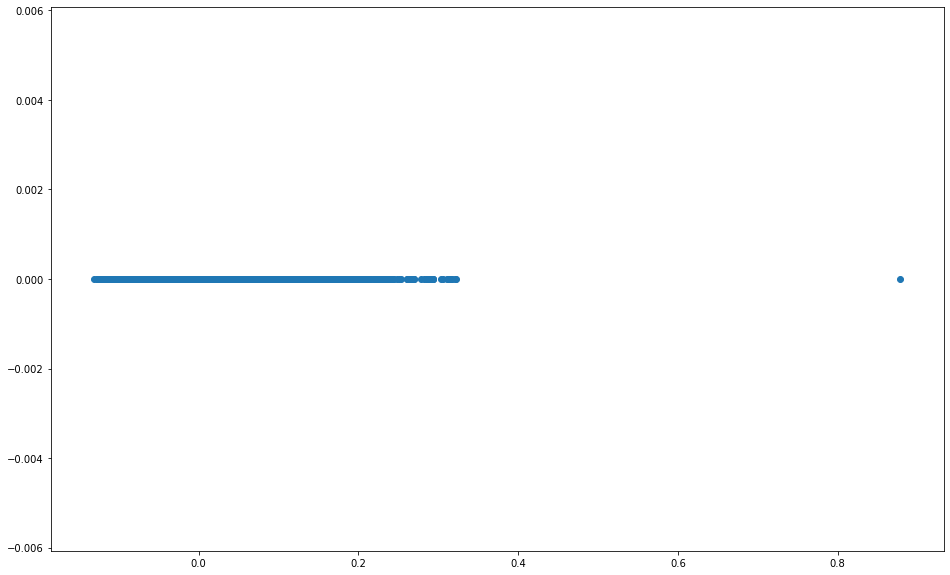

In [173]:
plt.figure(figsize=(16,10))
plt.scatter(pnr_pca[:,0], pnr_pca[:,1])

In [174]:
pca = PCA(n_components=2)

In [175]:
ssr_pca = pca.fit_transform(ssr_emb)

In [176]:
pca.explained_variance_ratio_

array([1.000000e+00, 4.956594e-14], dtype=float32)

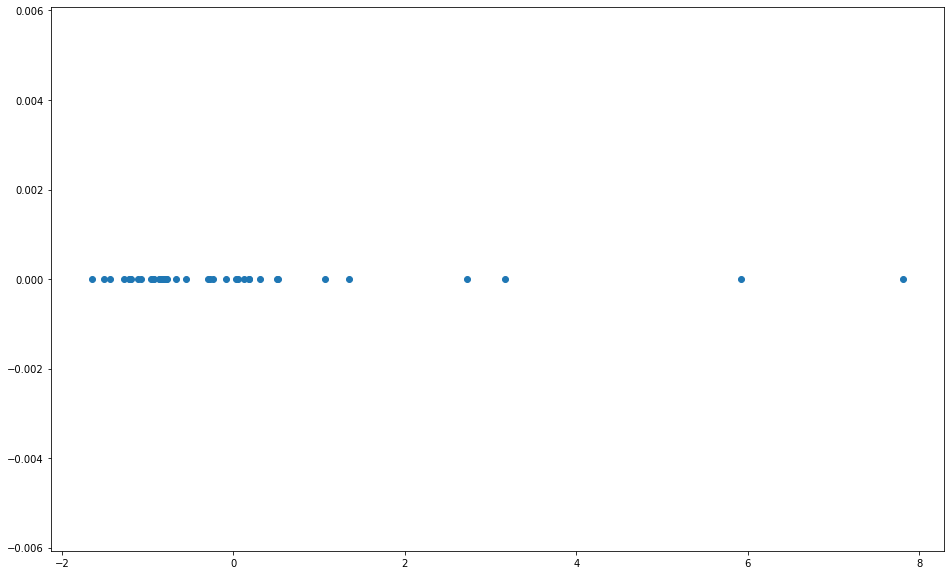

In [177]:
plt.figure(figsize=(16,10))
plt.scatter(ssr_pca[:,0], ssr_pca[:,1])

In [135]:
u_id, i_id =data.train_ds.x.classes.values()
user_dict = {v:k for k,v in enumerate(u_id)}
prod_dict = {v:k for k,v in enumerate(i_id)}

In [144]:
item_bias = learn.model.i_bias.weight.detach().cpu().numpy()

In [148]:
item_bias = [(b, k) for b,k in zip(item_bias,prod_dict)]

In [149]:
sorted(item_bias, reverse=True, key=lambda x: x[0] )

[(array([-2.832123e-11], dtype=float32), '#na#'),
 (array([-0.69209], dtype=float32), 'RQST'),
 (array([-1.111282], dtype=float32), 'PDBG'),
 (array([-1.156368], dtype=float32), 'CBAG'),
 (array([-1.350224], dtype=float32), 'KKML'),
 (array([-1.365994], dtype=float32), 'ABAG'),
 (array([-1.476783], dtype=float32), 'GLML'),
 (array([-1.479821], dtype=float32), 'LIML'),
 (array([-1.480844], dtype=float32), 'HSML'),
 (array([-1.496683], dtype=float32), 'VMML'),
 (array([-1.512649], dtype=float32), 'VEML'),
 (array([-1.529408], dtype=float32), 'PSML'),
 (array([-1.550252], dtype=float32), 'LEML'),
 (array([-1.55148], dtype=float32), 'CDML'),
 (array([-1.554528], dtype=float32), 'HBML'),
 (array([-1.55771], dtype=float32), 'BEML'),
 (array([-1.569818], dtype=float32), 'COML'),
 (array([-1.592279], dtype=float32), 'KRML'),
 (array([-1.605185], dtype=float32), 'CRML'),
 (array([-1.624035], dtype=float32), 'CBML'),
 (array([-1.627516], dtype=float32), 'LMML'),
 (array([-1.634233], dtype=float3

In [178]:
from sklearn.metrics import pairwise_distances 

In [201]:
def close_prod(prod, prod_dict, ssr_emb=ssr_emb, n=5):
    """
    serve to give the most closely products to the given product
    """
    dist = pairwise_distances(ssr_emb, ssr_emb)
    dist_prod = [(v, k) for v,k in zip(dist[prod_dict[prod]], prod_dict)]
    return sorted(dist_prod, key=lambda x: x[0])[1:n+1]

In [240]:
close_prod('KMML', prod_dict, ssr_emb)

[(0.1397978, 'LAML'),
 (0.21685195, 'MMML'),
 (0.37101322, 'HLML'),
 (0.4336205, 'PCML'),
 (0.44619757, 'STML')]